In [2]:
import pandas as pd
from sklearn import tree
from scipy import misc 
import pydot
from sklearn import grid_search

data  = pd.read_excel('titanic.xlsx')

data = data.dropna()

data['Sex'] = data['Sex'].apply(lambda x: int (0) if x == 'male'  else int(1))

cols = ['Pclass'] + ['Sex'] + ['Age'] + ['Fare']

X = data[cols]

Y = data['Survived']

clf  = tree.DecisionTreeClassifier()
clf.fit(X[: len(X)/2],Y[: len(X)/2])

print "Without pruning: " + str(clf.score(X[len(X)/2  :], Y[len(X)/2 :]))

with open("titanic.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f, feature_names=['Pclass', 'Sex', 'Age', 'Fare'],
                             class_names=['Survived', 'Not Survived'], filled=True, rounded=True,  
                         special_characters=True)


(graph,) = pydot.graph_from_dot_file('titanic.dot')
graph.write_png('titanic.png')

parameters = {'max_depth':range(3,20)}
clf = grid_search.GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)

Y

clf.fit(X, Y)
tree_model = clf.best_estimator_
print "With Pruning: " + str(clf.best_score_) + str(clf.best_params_)

with open("titanic2.dot", 'w') as f:
    f = tree.export_graphviz(tree_model, out_file=f, feature_names=['Pclass', 'Sex', 'Age', 'Fare'],
                             class_names=['Survived', 'Not Survived'], filled=True, rounded=True,  
                         special_characters=True)

(graph,) = pydot.graph_from_dot_file('titanic2.dot')
graph.write_png('titanic2.png')


Without pruning: 0.75
With Pruning: 0.792349726776{'max_depth': 10}


True

In [3]:
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

cols = ['Pclass'] + ['Sex'] + ['Age'] + ['Fare']

X = data[cols]

Y = data['Survived']
logreg = linear_model.LogisticRegression(C=1e5)

logreg.fit(X[: len(X)/2],Y[: len(X)/2])



LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [4]:
import numpy as np
print logreg.score(X[len(X)/2  :], Y[len(X)/2 :])

pd.DataFrame(zip(X.columns, np.transpose(logreg.coef_)))

0.739130434783


,0,1
0,Pclass,[-0.963486888697]
1,Sex,[3.09165986995]
2,Age,[-0.0506957747237]
3,Fare,[-0.00535205581666]


In [5]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(logreg, X, Y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.89473684  0.73684211  0.84210526  0.88888889  0.66666667  0.77777778
  0.66666667  0.55555556  0.83333333  0.72222222]
0.758479532164


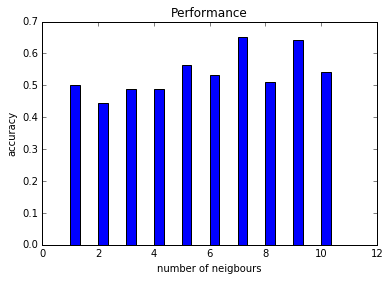

Maximum Score, K: 0.652173913043 7


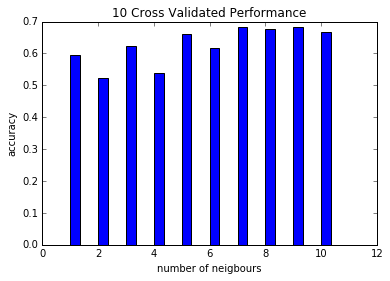

Maximum Score, K: 0.683333333333 9


In [6]:
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

y = []

maxs = 0
maxi = 0

for i in np.arange(1, 11):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X[: len(X)/2],Y[: len(X)/2])
    score = neigh.score(X[len(X)/2  :], Y[len(X)/2 :])
    
    if(score > maxs):
        maxs = score
        maxi = i
    y.append(score)
    


rects1 = plt.bar(np.arange(1, 11), y, 0.35, color='b')

plt.xlabel("number of neigbours")
plt.ylabel("accuracy")
plt.title("Performance")
plt.show()

print "Maximum Score, K:", maxs, maxi


y = []
maxs = 0
maxi = 0
for i in np.arange(1, 11):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X[: len(X)/2],Y[: len(X)/2])
    scores = cross_val_score(neigh, X, Y, scoring='accuracy', cv=10)

    if(scores.mean() > maxs):
        maxs = scores.mean()
        maxi = i
    y.append(scores.mean())
    


rects1 = plt.bar(np.arange(1, 11), y, 0.35, color='b')

plt.xlabel("number of neigbours")
plt.ylabel("accuracy")
plt.title("10 Cross Validated Performance")
plt.show()

print  "Maximum Score, K:", maxs, maxi


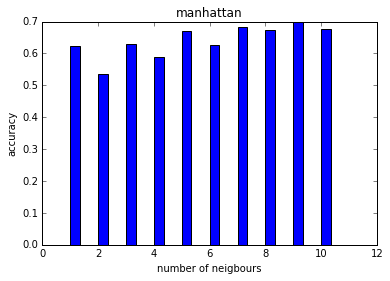

Maximum Score, K: 0.699707602339 9


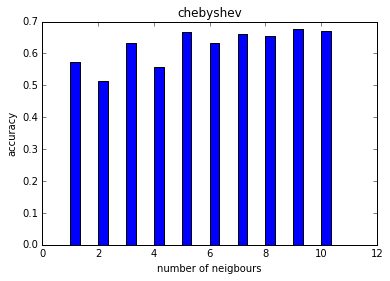

Maximum Score, K: 0.677777777778 9


In [7]:

metrics = ['manhattan', 'chebyshev']

for j in np.arange(0, 2):
    y = []
    maxs  =  0
    maxi = 0
    for i in np.arange(1, 11):
        
        neigh = KNeighborsClassifier(n_neighbors=i, metric=metrics[j])
        neigh.fit(X[: len(X)/2],Y[: len(X)/2])
        scores = cross_val_score(neigh, X, Y, scoring='accuracy', cv=10)
        
        if(scores.mean() > maxs):
            maxs = scores.mean()
            maxi = i
        y.append(scores.mean())
        
        
    rects1 = plt.bar(np.arange(1, 11), y, 0.35, color='b')
    plt.xlabel("number of neigbours")
    plt.ylabel("accuracy")
    plt.title(metrics[j])
    plt.show()
    
    print  "Maximum Score, K:", maxs, maxi
    



In [9]:
import pandas as pd


red = pd.read_csv('winequality-red.csv', delimiter=';')
white = pd.read_csv('winequality-white.csv', delimiter=';')

x = [ red['fixed acidity'].mean(), red['volatile acidity'].mean(),
     red['citric acid'].mean(), red['residual sugar'].mean(), red['chlorides'].mean(), 
    red['free sulfur dioxide'].mean(), red['total sulfur dioxide'].mean(), red['density'].mean(), 
     red['pH'].mean(), red['sulphates'].mean(), red['alcohol'].mean()
    ] 

y  = [ white['fixed acidity'].mean(), white['volatile acidity'].mean(),
     white['citric acid'].mean(), white['residual sugar'].mean(), white['chlorides'].mean(), 
    white['free sulfur dioxide'].mean(), white['total sulfur dioxide'].mean(), white['density'].mean(), 
     white['pH'].mean(), white['sulphates'].mean(), white['alcohol'].mean()
    ] 



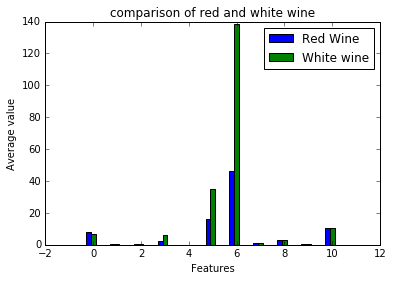

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

f = np.arange(0, 11)

ax = plt.subplot(111)

bx = ax.bar(f-0.2, x,width=0.2,color='b',align='center')

by = ax.bar(f,y ,width=0.2,color='g',align='center', )

ax.legend( (bx[0], by[0]), ('Red Wine', 'White wine') )

plt.xlabel("Features")
plt.ylabel("Average value")
plt.title("comparison of red and white wine")
plt.show()

In [11]:
print "Features"
pd.DataFrame(pd.Series(red.columns))

Features


,0
0,fixed acidity
1,volatile acidity
2,citric acid
3,residual sugar
4,chlorides
5,free sulfur dioxide
6,total sulfur dioxide
7,density
8,pH
9,sulphates


In [41]:

cols  = ['fixed acidity'] + ['volatile acidity'] + ['citric acid']+ ['residual sugar']+ ['chlorides'] + \
['free sulfur dioxide']+ ['total sulfur dioxide']+ ['density']+ ['pH']+ ['sulphates'] + ['alcohol'] + ['quality']


redcorrs = red[cols].corr().iloc[-1]

whitecorrs = white[cols].corr().iloc[-1]

In [13]:
pd.DataFrame(redcorrs)

,quality
fixed acidity,0.124052
volatile acidity,-0.390558
citric acid,0.226373
residual sugar,0.013732
chlorides,-0.128907
free sulfur dioxide,-0.050656
total sulfur dioxide,-0.185100
density,-0.174919
pH,-0.057731
sulphates,0.251397


In [14]:
pd.DataFrame(whitecorrs)

,quality
fixed acidity,-0.113663
volatile acidity,-0.194723
citric acid,-0.009209
residual sugar,-0.097577
chlorides,-0.209934
free sulfur dioxide,0.008158
total sulfur dioxide,-0.174737
density,-0.307123
pH,0.099427
sulphates,0.053678


In [54]:

cols  = ['fixed acidity'] + ['volatile acidity'] + ['chlorides'] + \
 ['total sulfur dioxide']+ ['pH']+ ['sulphates'] + ['alcohol'] + ['quality']



In [55]:
# Fixed acidity, volatile acidity, chlorides, total sulphur dioxide, ph, sulphates, alcohol

from sklearn import neighbors
from sklearn.metrics import r2_score



neigh =  neighbors.KNeighborsRegressor()

length = len(red[cols])

train_cols = red[cols] [0 : length/2]
test_cols = red[cols] [length/2 : ]


train_q = red['quality'] [0 : length/2]
test_q = red['quality'] [length/2 : ]

neigh.fit(train_cols, train_q)


pred_test_q = neigh.predict(test_cols)

print "K: " + str(neigh.n_neighbors)

print r2_score(test_q, pred_test_q)

import math

math.pow((test_q - pred_test_q).mean(), 2)


K: 5
0.519017882487


0.02059224999999994

In [56]:
parameters = {'n_neighbors':range(1,10)}

from sklearn import grid_search

clf = grid_search.GridSearchCV(neighbors.KNeighborsRegressor(), parameters, n_jobs=4)

clf.fit(train_cols, train_q)

model = clf.best_estimator_

print "Best score: " + str(clf.best_score_) + str(clf.best_params_)

pred_test_q = model.predict(test_cols)

print "R-sqaured: " + str(r2_score(test_q, pred_test_q))

print "\nMSE "
round(math.pow((test_q - pred_test_q).mean(), 2), 6)


Best score: 0.394424461789{'n_neighbors': 3}
R-sqaured: 0.56515911313

MSE 


0.014201

In [68]:
import sklearn

xtr, xtes, ytr, ytes = sklearn.cross_validation.train_test_split( red[cols], red['quality'], test_size=0.6, 
                                                                 train_size = 0.4)
lm = sklearn.linear_model.LinearRegression(fit_intercept=True)

lm.fit(xtr, ytr)

prediction = lm.predict(xtes)

print sklearn.metrics.mean_squared_error(ytes, prediction)
print sklearn.metrics.r2_score(ytes, prediction)



3.39990832849e-31
1.0
